## confusion matrix

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

dataset = "datasets/telecom_churn_clean.csv"
churn_df = pd.read_csv(dataset)
X = churn_df[["total_day_charge", "total_eve_charge"]].values # return DataFrame (two-dimensional)
y = churn_df["churn"].values # return series

# initialize the model with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit the model
knn.fit(X_train, y_train)

# generate prediction
y_predict = knn.predict(X_test)

# print the confusion matrix
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_predict)}")
print(f"\nClassification report:\n{classification_report(y_test, y_predict)}")

Confusion matrix:
[[1111   27]
 [ 142   54]]

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



explanation for the results above:
- confusion matrix:
```

	                        Predicted: 0 (Not Churned)	Predicted: 1 (Churned)
Actual: 0 (Not Churned)	    1111 (True Negatives) 	27 (False Positives)
Actual: 1 (Churned)	    142 (False Negatives) 	54 (True Positives)


```

## Logistic regression and the ROC curve

Logreg prediction: [0 0 0 ... 0 0 0]
Logreg prediction prediction probabilities: 0.19045733634408565


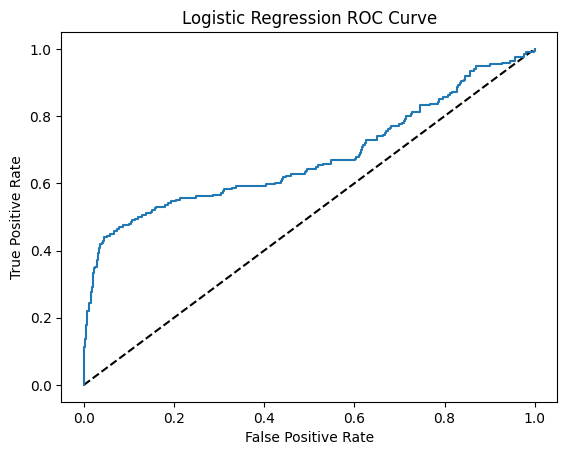

ROC AUC Score: 0.6761997417596213


In [14]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = "datasets/telecom_churn_clean.csv"
churn_df = pd.read_csv(dataset)
X = churn_df[["total_day_charge", "total_eve_charge"]].values # return DataFrame (two-dimensional)
y = churn_df["churn"].values # return series

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f"Logreg prediction: {logreg.predict(X_test)}")
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(f"Logreg prediction prediction probabilities: {y_pred_probs[0]}")

# plotting ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## RPC AUC
from sklearn.metrics import roc_auc_score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

## Hyperparameter tuning
- Grid search cross-validation

In [22]:
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.linear_model import Ridge

import numpy as np

kf = KFold(n_splits=6, shuffle=True, random_state=42)

param_grid = {"alpha": np.linspace(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

print(f"Best params Grid Search: {ridge_cv.best_params_}")
print(f"Best score Grid Search: {ridge_cv.best_score_}")


# using RandomizedSearchCV
ridge_random_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_random_cv.fit(X_train, y_train)
print(f"Best params Randomized Search: {ridge_random_cv.best_params_}")
print(f"Best score Randomized Search: {ridge_random_cv.best_score_}")
print(f"Test Set Score: {ridge_random_cv.score(X_test, y_test)}")


Best params Grid Search: {'alpha': np.float64(0.2223), 'solver': 'sag'}
Best score Grid Search: 0.03589833585831994
Best params Randomized Search: {'solver': 'sag', 'alpha': np.float64(0.4445)}
Best score Randomized Search: 0.035896995502242936
Test Set Score: 0.0631378003485199
